In [1]:
#<img src="images/header.png" height = "1000" width="600">

In [23]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib inline

 # Seminario: Optimización con Pyomo
 
 _Jose Angel Velasco (javelascor@indra.es)_ 
 
 _Indra Digital Labs | IA_
 
 _26 Marzo de 2021_


## Motivación
<img src="images/ba.png" width="600">

## Introducción a la optimizacion
* La __optimización__ consiste en la toma de la mejor decisión posible (de un conjunto de soluciones factibles) en base a un objetivo concreto (funcion objetivo) y sujeto a ciertos requisitos (restricciones)

* Mediante __programación matemática__ se puede formular dicha funcion objetivo y restricciones utilizando un lenguaje algebraico

* Alternativa a programación matemática: _métodos heuristicos_

* El soporte a la toma de decisiones mediante optimización con programación matemática es a menudo desconocida o bien descartada por falta de tiempo y/o recursos. 

* En este seminario se realizará un breve repaso a conceptos de optimización y se
presentará Pyomo para la resolución de diferentes problemas tipo.





##### Ejemplos

* Problemas Lineales
    * __Problemas del transporte__
    * Problema de la planificación de la producción
    * Problema de la dieta
    * __Problema del flujo en una red__
    * __Problema de la cartera de valores__
    * Problema del despacho economico de centrales eléctricas
* Problemas lineal entero-mixto
    * __Optimización de rutas__
    * Problema de la mochila
    * Problema de Identificación de sintomas relevantes
    * Problema de la academia de ingenieria
    * Problema del horario
    * __Problema de localización de plantas logisticas__
    * __Problema de programación de centrales eletricas (térmica)__
    * Problema de coordinación de centrales electricas (termica e hidrotérmica)
    

* Problemas no-lineales
    * __Problema de estimación de estado de sensores (state estimation)__
    * Problema del reparto óptimo de carga en redes electricas (Optimal power flow)
    * __Problema de la asignación de trafico__
    * Problemas de regresión (mínimos cuadrados)
    * Aplicaciones de inteligencia artificial (ej: redes neuronales RMSE como objetivo) 
    * Control óptimo para el alcance de un blanco

### Programacion matematica 
* La programación matemática tiene su origen en 1947 cuando George B. Dantzig publicó el algoritmo [Simplex](https://en.wikipedia.org/wiki/Simplex_algorithm) (Programación lineal)

<img src="images/Simplex-method-3-dimensions.png" width="300">

* En la páctica, un problema de optimización consiste minimizar (o maximizar) una función objetivo __convexa__ y real $f(x)$ eligiendo sistemáticamente valores de entrada (tomados de un conjunto permitido) y calculando el valor de la función sujeto a ciertas restricciones de igualdad y desigualdad. 

\begin{array}{ll}
\min & f(x) = c^{T} x\\
s.t. & g(x) = b\\
     & h(x) \leq c\\
     & x \geq 0 
\end{array}

   * $x$ es la variable de decision

   * $f(x)$ es la funcion objetivo (minimizar costes, retrasos, riesgos, etc...)
   
   * $g(x)$ y $h(x)$ son restricciones y definen limitaciones, realidades de negocio, etc.

### Forma standard
   * minimizacion
   * restricciones de igualdad ( si las hay, existen tecnicas para convertir a igualdad)
   * $x>0$
   * $b>0$
* Si la función objetivo o las restricciones tienen elementos no lineales ($x^2, sin(x), ...$), el problema es NLP (Non-Linear Programming)

* Si existen variables enteras $x \in (0,1)$ el problema es MIP (Mixed-Integer Programming)

* Una solución $\tilde{x} = (x_1 , x_2 , \ldots , x_n )$ que satisface todas las restricciones  se denomina _solucion factible_. El conjunto de todas esas soluciones es la _region de factibilidad_ 
* Un punto factible $\tilde{x}^{*}$ tal que $f(\tilde{x}^{*}) \leq f(\tilde{x})$ para cualquier otro punto factible $\tilde{x}$ se denomina una _solucion optima_ del problema.

### Dualidad
Es una relacion simetrica, esto es, si el problema D es
el dual del problema P, entonces P es el dual de D.

Dado el problema de programacion lineal denominado problema _primal_,

\begin{array}{ll}
\min & f(x) = c^{T} x\\
s.t. & Ax \ge  b\\
     & x \geq 0 
\end{array}

su problema _dual_ es maximizar:

\begin{array}{ll}
\max & f^{'}(y) = b^{T} y\\
s.t. & A^{T} y \leq  c\\
     & y \geq 0 
\end{array}

$y$ es __variable dual__

Bajo ciertas hipotesis, los problemas _primal_ y _dual_ dan lugar al mismo valor optimo de la funcion objetivo, y por tanto se puede resolver indirectamente el problema primal resolviendo el problema dual.

### Programacion Lineal

<img src="images/LP_pro.png" width="500">

* Funcion objetivo y restricciones lineales
* Algoritmo:
    * simplex
    * Punto interior

* Ejemplo: 

\begin{array}{ll}
\min & 2x + 3y \\
s.t. & 3x + 4y \geq 1\\
     & x,y \geq 0 
\end{array}


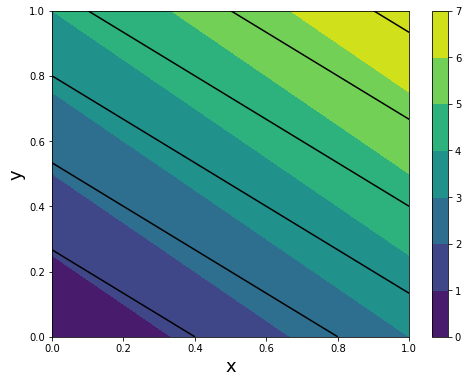

In [11]:
x = np.linspace(0, 1)
y = np.linspace(0, 1)
xx, yy = np.meshgrid(x, y)

plt.figure(figsize=(8,6))
plt.contour(xx, yy, 2 * xx + 3 * yy, colors='k')
plt.contourf(xx, yy, 3 * xx + 4 * yy, cmap=plt.cm.viridis)
plt.colorbar()
plt.xlabel('x', fontsize=18)
plt.ylabel('y',fontsize=18)
plt.show()

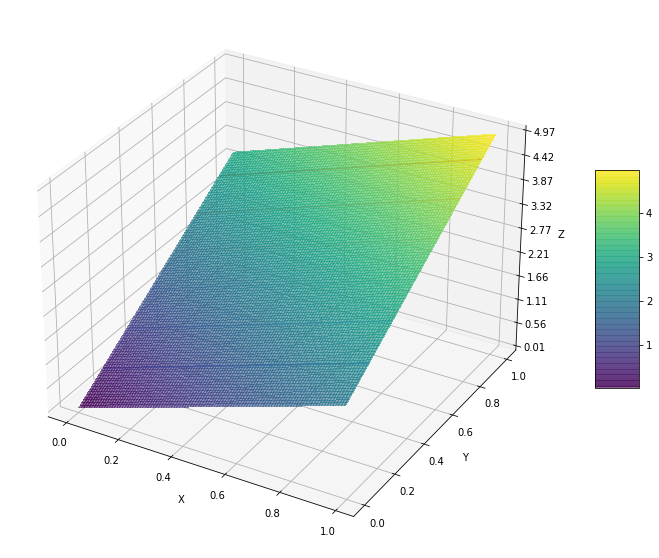

In [21]:
#we will use numpy functions in order to work with numpy arrays
def function(x,y):
    z  = 2 * x + 3 * y
    #z  = 3 * x + 4 * y
    return z

n = 200
x = np.random.uniform(0, 1, n)
y = np.random.uniform(0, 1, n)
z = function(x, y)

#we create two 1D arrays of the desired lengths:
x_1d = np.linspace(min(x), max(x), n)
y_1d = np.linspace(min(y), max(y), n)

#And we use the meshgrid function to create the X and Y matrices!
X, Y = np.meshgrid(x_1d, y_1d)

#Using Numpy arrays, calculating the function value at the points is easy!
Z = function(X,Y)

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z,
                       rstride=2,
                       cstride=2,
                       alpha=0.6,
                       cmap=plt.cm.viridis, #cm.jet, # coolwarm
                       linewidth=0, antialiased=False)
# Customize the z axis.
#ax.set_zlim(-120, 120)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# add contour 
cset = ax.contour(X, Y, Z, zdir='y', cmap=cm.coolwarm)

ax.set_xlabel('X')
#ax.set_xlim(-8, 8)
ax.set_ylabel('Y')
#ax.set_ylim(-8, 8)
ax.set_zlabel('Z')
#ax.set_zlim(-2, 2)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.4, aspect=5)
plt.show()

### Programación Lineal Entera-Mixta (MILP)

<img src="images/mip_p.png" width="400">

* Funcion objetivo y restricciones lineales
* Incluye toma de decisiones logicas con variables binarias
* Algoritmos:
    * Ramificación y acotamiento (branch & bound)
    * Cortes de gomory

* Ejemplo: Seleción de la mejor ruta de producción 

\begin{array}{ll}
\min & c^T + d^Ty \\
s.t. & Ax + By \leq 1\\
     & x \geq 0  \\
     & y \in (0,1) 
\end{array}

### Programación No-Lineal (NLP)

* Funcion objetivo y/o restricciones no-lineales
* Algoritmos:
    * Condiciones de optimalidad de Karush-Kuhn-Tucker

* Ejemplo: Flujo de carga óptimo en red de energía eléctrica

\begin{array}{ll}
\min & z = f(x) \\
s.t. & h(x)=0\\
     & g(x)\le 0  \\
     & x \le 0 
\end{array}

* Ejemplo de funciones no lineales: Función de Rosenbrock

$$ f(x, y) = (a - x)^2 + b (y - x^2)^2 $$

$$a=1$$
$$b=100$$

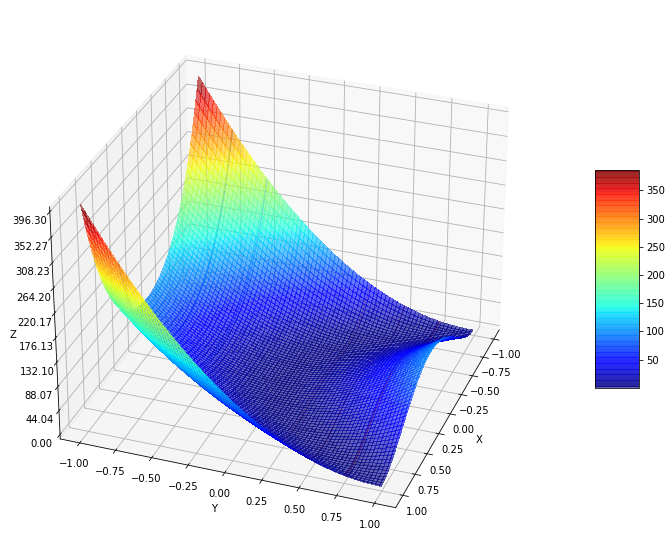

In [26]:
#we will use numpy functions in order to work with numpy arrays
def rosembrock(x,y):
    z  = (1-x)**2+100*(y-x**2)**2
    return z 

n = 150
x = np.random.uniform(-1, 1, n)
y = np.random.uniform(-1, 1, n)
z = rosembrock(x, y)

#we create two 1D arrays of the desired lengths:
x_1d = np.linspace(min(x), max(x), n)
y_1d = np.linspace(min(y), max(y), n)

#And we use the meshgrid function to create the X and Y matrices!
X, Y = np.meshgrid(x_1d, y_1d)

#Using Numpy arrays, calculating the function value at the points is easy!
Z = rosembrock(X,Y)

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z,
                       rstride=2,
                       cstride=2,
                       alpha=0.6,
                       cmap=cm.jet,
                       linewidth=0,
                       antialiased=False)
# Customize the z axis.
#ax.set_zlim(-120, 120)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# add contour 
cset = ax.contour(X, Y, Z, zdir='y', cmap=cm.coolwarm)

ax.set_xlabel('X')
#ax.set_xlim(-8, 8)
ax.set_ylabel('Y')
#ax.set_ylim(-8, 8)
ax.set_zlabel('Z')
#ax.set_zlim(-2, 2)

ax.view_init(30, 20)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.4, aspect=5)
plt.show()

### Programación No Lineal Entero Mixta (MINLP)

<img src="images/minlp.png" width="400">

* Funcion objetivo y/o restricciones no-lineales
* Incluye toma de decisiones logicas con variables binarias
* Algoritmos:
    * Aproximaciones Exteriores

* Ejemplo: Planificación de la expansión de la red eléctrica

\begin{array}{ll}
\min & z = f(x) + d^T y \\
s.t. & h(x) + By=0\\
     & g(x) + Dy \le 0  \\
     & x \le 0 \\
     & y \in (0,1)  
\end{array}





# Pyomo

* Dos de los lenguajes de modelado comerciales más utilizados para resolver este tipo de problemas matemáticos son [GAMS](https://www.gams.com) y [AMPL](https://ampl.com). 

* Como alternativa libre y gratuita existe [Pyomo](pyomo.org) que es un lenguaje de modelado algebraico basado en __Python__

* Otras alternativas: [JuMP (julia)](https://jump.dev), __SciPy__, __CVXopt__, __PuLP__

* Pyomo es un un lenguaje de modelado algebraico compatible con una amplia gama de tipos de problemas de optimización tipo:

    * [LP](https://www.analyticsvidhya.com/blog/2017/02/lintroductory-guide-on-linear-programming-explained-in-simple-english/) (Linear Prograaming)
    * [NLP](https://en.wikipedia.org/wiki/Nonlinear_programming) (Non-Linear Programming)
    * [MIP](https://en.wikipedia.org/wiki/Integer_programming) (Mixed-Integer Programming)
    * [MINLP](https://neos-guide.org/content/mixed-integer-nonlinear-programming) (Mixed-Integer Non-Linear Programming)

* Deseable optimización convexa

* Pyomo se comunica con los principales solvers comerciales, gratuitos y/o libres:

    * [GLPK (GNU Linear Programming Kit)](https://www.gnu.org/software/glpk/) (libre, LP/MIP)
    * [IPOPT](https://coin-or.github.io/Ipopt/) (libre, LP/NLP)
    * [CONOPT](http://www.conopt.com) (gratuito, NLP)
    * [CPLEX](https://www.ibm.com/es-es/analytics/cplex-optimizer) (comercial, LP/MIP)
    * [GUROBI](https://www.gurobi.com/products/gurobi-optimizer/) (comercial, LP/MIP)
    * [BARON (Branch-and-Reduce Optimization Navigator)](https://minlp.com/baron) (comercial MIP/MINLP)
    * [CBC (Coin-or branch and cut)](https://projects.coin-or.org/Cbc)(libre, MIP)
    * [MindtPy (Mixed-Integer Nonlinear Decomposition Toolbox in Pyomo)](https://pyomo.readthedocs.io/en/stable/contributed_packages/mindtpy.html) (libre, MINLP)
    
    
| Solver        | LP   | MIP | NLP   |MINLP  |
| :-----------: |:----:| :--:|:-----:|:-----:|
| GLPK          | X    | X   |   -    |   -    |
| IPOPT         |    -  | -    | X     |   -    |
| CONOPT        | -     | -    | X     |   -    |
| CBC           | -     | X    | -     |   -    |
| BARON         | -     | X    | X     |   X    |
| GUROBI        | X    | X   |    -   |   -    |
| CPLEX         | X    | X   |   -    |   -    |
| MindtPy       |    -  | -    |   -    | X     |



## Instalación
Crear entorno de python con version 3.6 o 3.7 con una ventana de comandos

```
conda create -n pyomo36 python=3.6 numpy pandas matplotlib plotly scipy jupyter ipython
```
Comprobar entorno 

```
conda env list
```

Activar entorno

```
conda activate pyomo36
```

Instalar pyomo 

```
conda install pyomo -c conda-forge
```

Comprobar que se ha instalado correctamente

```
pyomo
```

Instalar extras: [NEOS server](https://neos-server.org/neos/)

```
conda install pyomo.extras --channel conda-forge
```

Instalar solver GLPK

```
conda install glpk -c conda-forge
```

Instalar solvers IPOPT

```
conda install -c cachemeorg ipopt_bin
```

Detectar solvers instalados

```
pyomo help -s
```

Ayuda sobre componentes
```
pyomo help --components
```

Ayuda sobre pyomo en general

```
pyomo help -a
```

## Modelado
* El modelado es un proceso fundamental en muchos aspectos de la investigación, ingeniería y los negocios. El modelado involucra la formulación de una representación simplificada de una sistema o de un objecto del mundo real. 

* Un modelo matemático incluye los siquientes componentes:
    * __Variables__: Representan incognitas dentro del modelo y el objetivo es determinar su valor. Los valores que toman las variables corresponden con la solución del problema y proporcionan la decisión a tomar óptima ya que son el resultado de un proceso de optimización.
    * __Parámetros__: Representan los datos conocidos sobre el problema de optimización. Pueden ser vectores o matrices.
    * __Función objectivo__: Ecuación a minimizar o maximizar que relaciona las variables con los parámetros del modelo.
    * __Restricciones__: Ecuaciones de igualdad o desigualdad que imponen ciertos comportamientos a las variables.

## Proceso 
* Pyomo soporta un diseño orientado a objectos para la modelización. Los pasos a seguir son los siguientes

    * Definir modelo y componentes
    * Instanciar modelo
    * Aplicar solver
    * Consultar resultados
    

## Componentes
Un modelo de pyomo consiste en un conjunto de componentes de lenguaje algebraico definidos a traves de clases de pyomo:
   * Indices
   * conjuntos
   * variables de decisión
   * parámetros
   * función objetivo
   * restricciones. 
   * expresiones


## Tipos de modelos

### Concreto
   * Paramteros del modelo directos
        
        
\begin{array}{ll}
\min & z= 2x_1 + 3x_2\\
s.t. & 3x_1 + 4x_2 \geq 1\\
     & x_1,x_2 \geq 0 
\end{array}

### Abstracto
   * Parámetros del modelo 
   * Independecia modelo y datos
    
\begin{array}{lll}
\min & z=  \sum_{j=1}^n c_j x_j & \\
s.t. & \sum_{j=1}^n a_{i,j} \cdot x_j \geq b_i & \forall i = 1 \ldots m\\
     & x_j \geq 0 & \forall j = 1 \ldots n
\end{array}



## Ejemplo Modelo Abstracto: Problema del transporte

* Original problem formulation:
  - Dantzig, G B, Chapter 3.3. In Linear Programming and Extensions. Princeton University Press, Princeton, New Jersey, 1963.
  
<img src="images/transporte_ilustracion.png" width="400">


\begin{equation}
\begin{array}{lll}
\min & z =  \sum_{j=1}^n c_{i,j} x_{i,j}  & (1a) & \\
s.t. & \sum_{j=1}^n x_{i,j} \leq u_i & ,\forall i \in (1, \ldots, m) & (1b) \\
     & \sum_{i=1}^m x_{i,j} = d_j & ,\forall i \in (1, \ldots, n)& (1c)  \\
     & x_{i,j} \geq 0 & ,\forall j \in (1 ,\ldots, n) & (1d)
\end{array}
\end{equation}

__Datos__
* $m$ Numero de origenes
* $n$ Numero de destinos
* $u_i$ Stock de producto en origen $i$
* $d_j$ Demanda de producto en destino $j$
* $c_{i,j}$ coste unitario de envio de producto desde origen $i$ a destino $j$ (€/ud)  




__Variable objetivo (o de decisión)__
* $x_{i,j}$ Cantidad de producto que va del origen $i$ al destino $j$ 

__Restricciónes__ 
* __1b__: Limitación stock 

* __1c__: garantizar suministro demanda

* __1d__: Cantidades positivas. _Esto implica que la direccion de envıo del producto esta prefijada desde los distintos orıgenes hasta los destinos. No obstante, otras hipotesis podrıan tenerse en cuenta. Por ejemplo, podrıa no limitarse el signo de las variables , si no se quiere predeterminar cuales son los puntos de partida y llegada_





### importar libreria pyomo

In [2]:
import pyomo.environ as pyo

### Iniciar modelo abstracto

In [3]:
model = pyo.AbstractModel()

### Definir conjuntos (Sets) [opcion a]

In [4]:
model.origen = pyo.Set() # origenes i in (1,...,m)
model.destino = pyo.Set() # destinos j in (1,...,n)

### Definir conjuntos (Sets) [opcion b]

In [5]:
# Crear primero un parametro que marca la dimension del indice
model.m = pyo.Param(within='NonNegativeIntegers') # 'PositiveReals' Si incluimos el 0
model.n = pyo.Param(within='NonNegativeIntegers')

# Definir luego los sets como un rango de valores entre 1 y la dimension del indice
model.I = pyo.RangeSet(1, model.m)
model.J = pyo.RangeSet(1, model.n)

### Definir parametros (datos conocidos)

In [6]:
model.stock = pyo.Param(model.origen) # stock en origen i
model.demanda = pyo.Param(model.destino) # demanda en destino j
model.coste = pyo.Param(model.origen, model.destino) # coste de envio unitario de origen i a destino J

### definir variable de decision 

In [7]:
model.x = pyo.Var(model.origen, model.destino, domain=pyo.NonNegativeReals)

### Definir funcion objetivo

In [8]:
### primero definir expresion que define la funcion objetivo
def pyomo_of(model):
    return sum(model.c[i,j] * model.x[i,j] for i in model.origen for j in model.destino) 

### despues definir el component de la funcion objetivo
model.total_cost = pyo.Objective(rule=pyomo_of)

### Definir restricciones

In [9]:
# Definir restriccion stock
def pyomo_constraint_stock(model, i):
    # devuelve la expression de la restriccion para el valor de i
    return sum(model.x[i,j] for j in model.destino) <= model.stock[i]

# definir entidad de la restriccion para indice I
model.const_stock = pyo.Constraint(model.origen, rule=pyomo_constraint_stock)

In [10]:
# Definir restriccion demanda
def pyomo_constraint_demand(model, j):
    # devuelve la expression de la restriccion para el valor de i
    return sum(model.x[i,j] for i in model.origen) == model.demanda[j]

# definir entidad de la restriccion para indice I
model.const_demand = pyo.Constraint(model.destino, rule=pyomo_constraint_demand)

### Definir funcion que genera el modelo

In [24]:
def dl_ia_opt_build_model():
    """ Builds an abstract pyomo model for the transport problem based
    :return: abstract pyomo model
    """
    
    import pyomo.environ as pyo
    
    model = pyo.AbstractModel()
    
    # Sets
    model.origen = pyo.Set() #  origenes (1,...,m)
    model.destino = pyo.Set() # destinos (1,...,n)
    
    # Parametros
    model.stock = pyo.Param(model.origen, domain=pyo.NonNegativeReals) # stock en origen i
    model.demanda = pyo.Param(model.destino, domain=pyo.NonNegativeReals) # demanda en destino j
    model.coste = pyo.Param(model.origen, model.destino, domain=pyo.NonNegativeReals) # coste de envio unitario de origen i a destino J
    
    # variable objetivo
    model.x = pyo.Var(model.origen, model.destino, domain=pyo.NonNegativeReals)

    ### primero definir expresion que define la funcion objetivo
    def of_expression(model):
        return sum(model.coste[i,j] * model.x[i,j] for i in model.origen for j in model.destino) 

    ### despues definir el component de la funcion objetivo
    model.total_cost = pyo.Objective(rule=of_expression)

    # Definir restriccion stock
    def pyomo_constraint_stock(model, i):
        # devuelve la expression de la restriccion para el valor de i
        return sum(model.x[i,j] for j in model.destino) <= model.stock[i]

    # definir entidad de la restriccion para indice I
    model.const_stock = pyo.Constraint(model.origen, rule=pyomo_constraint_stock)
    
    # Definir restriccion demanda
    def pyomo_constraint_demand(model, j):
        # devuelve la expression de la restriccion para el valor de i
        return sum(model.x[i,j] for i in model.origen) == model.demanda[j]

    # definir entidad de la restriccion para indice I
    model.const_demand = pyo.Constraint(model.destino, rule=pyomo_constraint_demand)
 
    
    return model

In [25]:
model = dl_ia_opt_build_model()

### Datos

<img src="images/mapa_fabricas_puertos.png" width="500">

In [26]:
df_data = pd.DataFrame({ 'origen':['Barcelona'   , 'Barcelona'   , 'Barcelona'   ,'Valencia'   ,'Valencia'   ,'Valencia'   ,'Bilbao'    ,'Bilbao'    ,'Bilbao'   ],
                         'destino':['Madrid' ,'Sevilla' ,'Malaga'  ,'Madrid' ,'Sevilla'  ,'Malaga' ,'Madrid' ,'Sevilla'  ,'Malaga'  ],
                         'coste':[0.682,0.995 ,0.976 ,0.562, 0.756, 0.720, 0.402 ,0.861 ,0.922],
                         'stock':[174  ,174   ,174   ,36  ,36  ,36  ,57   ,57   ,57  ] ,
                         'demanda':[54  ,45   ,23   ,54  ,45  ,23  ,54   ,45   ,23  ],
                   })

df_data

,origen,destino,coste,stock,demanda
0,Barcelona,Madrid,0.682,174,54
1,Barcelona,Sevilla,0.995,174,45
2,Barcelona,Malaga,0.976,174,23
3,Valencia,Madrid,0.562,36,54
4,Valencia,Sevilla,0.756,36,45
5,Valencia,Malaga,0.720,36,23
6,Bilbao,Madrid,0.402,57,54
7,Bilbao,Sevilla,0.861,57,45
8,Bilbao,Malaga,0.922,57,23


#### Visualizar datos entrada

##### Stock y demanda

In [27]:
# Plot stocks
df_aux = df_data[['origen','stock']].drop_duplicates()

fig = px.bar(df_aux,
             x="origen",
             y="stock",
             title="Stocks")
fig.update_yaxes(title_text='Stocks (ud)')
fig.update_xaxes(title_text='Origenes')
fig.update_layout(font=dict(family="Courier New, monospace", size=18, color="#7f7f7f"))
fig.show()

# Plot demanda
df_aux = df_data[['destino','demanda']].drop_duplicates()

fig = px.bar(df_aux,
             x="destino",
             y="demanda",
             title="Demanda")
fig.update_yaxes(title_text='Demanda (ud)')
fig.update_xaxes(title_text='Destinos')
fig.update_layout(font=dict(family="Courier New, monospace", size=18, color="#7f7f7f"))
fig.show()

##### Costes

In [28]:
df_aux = df_data[['origen','destino','coste']].drop_duplicates().pivot(index='destino',values='coste', columns='origen').fillna(0)

fig = go.Figure(data=go.Heatmap(
                   z=df_aux.values,
                   y=df_data['origen'].unique().tolist(),
                   x=df_data['destino'].unique().tolist(),
                   hoverongaps = False))
fig.update_yaxes(title_text='origen')
fig.update_xaxes(title_text='destino')
fig.update_layout(title='Costes de envio')
fig.update_layout(font=dict(family="Courier New, monospace", size=18, color="#7f7f7f"))
fig.show()

### Guardar datos en formato adecuado

In [36]:
df_data[['origen', 'stock']].drop_duplicates()

,origen,stock
0,Barcelona,174
3,Valencia,36
6,Bilbao,57


In [29]:
df_data[['origen', 'stock']].drop_duplicates()['origen'].to_csv('data/set_origen.tab', index=False, sep=' ')
df_data[['destino', 'demanda']].drop_duplicates()['destino'].to_csv('data/set_destino.tab', index=False, sep=' ')

df_data[['origen', 'stock']].drop_duplicates().to_csv('data/param_stock.tab', index=False, sep=' ')
df_data[['destino', 'demanda']].drop_duplicates().to_csv('data/param_demand.tab', index=False, sep=' ')

df_data[['origen', 'destino', 'coste']].to_csv('data/param_coste.tab', index=False, sep=' ')

### Crear instancia de datos

In [32]:
data = pyo.DataPortal(model=model)

data.load(filename='data/set_origen.tab', set="origen", format="set")
data.load(filename='data/set_destino.tab', set="destino", format="set")

data.load(filename='data/param_stock.tab', param=model.stock)
data.load(filename='data/param_demand.tab', param=model.demanda)

data.load(filename='data/param_coste.tab', param=model.coste)

In [34]:
data.data()

{'origen': {None: ['Barcelona', 'Valencia', 'Bilbao']},
 'destino': {None: ['Madrid', 'Sevilla', 'Malaga']},
 'stock': {'Barcelona': 174, 'Valencia': 36, 'Bilbao': 57},
 'demanda': {'Madrid': 54, 'Sevilla': 45, 'Malaga': 23},
 'coste': {('Barcelona', 'Madrid'): 0.682,
  ('Barcelona', 'Sevilla'): 0.995,
  ('Barcelona', 'Malaga'): 0.976,
  ('Valencia', 'Madrid'): 0.562,
  ('Valencia', 'Sevilla'): 0.756,
  ('Valencia', 'Malaga'): 0.72,
  ('Bilbao', 'Madrid'): 0.402,
  ('Bilbao', 'Sevilla'): 0.861,
  ('Bilbao', 'Malaga'): 0.922}}

### Instanciar modelo con datos

In [35]:
instance = model.create_instance(data)

### comprobar instancia creada
instance.pprint()

4 Set Declarations
    coste_index : Size=1, Index=None, Ordered=True
        Key  : Dimen : Domain         : Size : Members
        None :     2 : origen*destino :    9 : {('Barcelona', 'Madrid'), ('Barcelona', 'Sevilla'), ('Barcelona', 'Malaga'), ('Valencia', 'Madrid'), ('Valencia', 'Sevilla'), ('Valencia', 'Malaga'), ('Bilbao', 'Madrid'), ('Bilbao', 'Sevilla'), ('Bilbao', 'Malaga')}
    destino : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {'Madrid', 'Sevilla', 'Malaga'}
    origen : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {'Barcelona', 'Valencia', 'Bilbao'}
    x_index : Size=1, Index=None, Ordered=True
        Key  : Dimen : Domain         : Size : Members
        None :     2 : origen*destino :    9 : {('Barcelona', 'Madrid'), ('Barcelona', 'Sevilla'), ('Barcelona', 'Malaga'), ('Valencia', 'Madrid'), ('Valencia', 'Sevi

### Definir Solver


In [46]:
# Definimos Solver
from pyomo.opt import SolverFactory
opt = SolverFactory("glpk")

### Resolver problema de optimización
Al resolver el modelo se dará una de las siguientes situaciones:
*  __El problema es no factible__: No existe ninguna solución que cumpla simultáneamente todas las restricciones
*  __El problema es no acotado__: Funcion no convexa (z=infinito)
* __Tiene una única solución__: El problema tiene solución factible, es acotado y existe un óptimo y es único
*  __Tiene múltiples soluciones__: El problema tiene solución factible, es acotado y existen varios óptimos. Todos los óptimos serán equivalentes, esto es, proporcionan el mismo valor de z


In [48]:
results = opt.solve(instance, tee=False) # tee is a option to plot process

#send results to stdout
#results.write()
#!cat results.yml

print('--- Problem Results ---')
print(results.Problem())
print('--- Solver Results ---')
print(results.Solver())

print('--- Restriccion Stock ---')
print(instance.const_stock.display())
print('--- Restriccion Demanda ---')
print(instance.const_demand.display())
print('--- Coste Total ---')
print(instance.total_cost.display())

--- Problem Results ---

Name: unknown
Lower bound: 79.534
Upper bound: 79.534
Number of objectives: 1
Number of constraints: 7
Number of variables: 10
Number of nonzeros: 19
Sense: minimize

--- Solver Results ---

Status: ok
Termination condition: optimal
Statistics: 
  Branch and bound: 
    Number of bounded subproblems: 0
    Number of created subproblems: 0
Error rc: 0
Time: 0.022034168243408203

--- Restriccion Stock ---
const_stock : Size=3
    Key       : Lower : Body : Upper
    Barcelona :  None : 29.0 : 174.0
       Bilbao :  None : 57.0 :  57.0
     Valencia :  None : 36.0 :  36.0
None
--- Restriccion Demanda ---
const_demand : Size=3
    Key     : Lower : Body : Upper
     Madrid :  54.0 : 54.0 :  54.0
     Malaga :  23.0 : 23.0 :  23.0
    Sevilla :  45.0 : 45.0 :  45.0
None
--- Coste Total ---
total_cost : Size=1, Index=None, Active=True
    Key  : Active : Value
    None :   True : 79.53399999999999
None


### Explorar Resultados

In [50]:
def dl_ia_opt_get_results(instance):
    """ Funtion to check resutls 
        :param results: optimization resutls
        :return: dataframe with resutls
    """
    
    import pandas as pd
    try:
        origen = []
        destino = []
        cantidad = []
        for i in instance.origen:
            for j in instance.destino:
                origen.append(i)
                destino.append(j)
                cantidad.append(instance.x[(i, j)].value)

        df_out = pd.DataFrame({'origen':origen, 'destino':destino, 'cantidad':cantidad})
        df_out['origen'] = df_out['origen'].astype(str)
        df_out['destino'] = df_out['destino'].astype(str)
        df_out['cantidad'] = df_out['cantidad'].astype(int)
        
        
        return df_out
        
        
    except Exception as exception_msg:
        print('(!) Error in dl_ia_opt_get_results: {}'.format(str(exception_msg)))

In [51]:
df_results = dl_ia_opt_get_results(instance)
print('Coste total: {} euros'.format(instance.total_cost.expr()))
print('Tiempo de ejecución: {} s'.format(round(results.Solver.Time,4)))
print('Suministro: {} lotes'.format(df_results['cantidad'].sum()))
df_results

Coste total: 79.53399999999999 euros
Tiempo de ejecución: 0.022 s
Suministro: 122 lotes


,origen,destino,cantidad
0,Barcelona,Madrid,0
1,Barcelona,Sevilla,29
2,Barcelona,Malaga,0
3,Valencia,Madrid,0
4,Valencia,Sevilla,13
5,Valencia,Malaga,23
6,Bilbao,Madrid,54
7,Bilbao,Sevilla,3
8,Bilbao,Malaga,0


In [52]:
df_aux = df_results[['origen','destino','cantidad']].drop_duplicates().pivot(index='destino',values='cantidad', columns='origen').fillna(0)

fig = go.Figure(data=go.Heatmap(
                   z=df_aux.values,
                   y=df_results['origen'].unique().tolist(),
                   x=df_results['destino'].unique().tolist(),
                   hoverongaps = False))
fig.update_yaxes(title_text='origen')
fig.update_xaxes(title_text='destino')
fig.update_layout(title='Cantidad de producto')
fig.update_layout(font=dict(family="Courier New, monospace", size=18, color="#7f7f7f"))
fig.show()

### Mejoras

   * __¿Y si existe stock minimo?__
       * _Restriccion stock minimo_
   * __¿Y si hay mas de un producto?__
       * _costes por origen, destino y producto_
   * __¿Y si hay diferentes modos de transporte?__
       * _costes origen, destino, modo_
   * __¿Y si los productos se pueden agrupar?__
       * _Añadir caracterisitcas del producto: peso, volumen, precio, reglas de agrupamiento_
   * __¿Y si no hay suficiente stock?__
       * _Introducir preferencias en destinos_
   * __¿Y si hay productos alternativos?__
       * _Introducir preferencia por original, suministrar alternativo en caso de no stock_
   * __¿Y si es multiperiodo?__
       * _Programación dinámica, introducir demanda y stock por horizonte temporal_
   * __¿Y que pasa si hay nodos intermedios?__
       * _Definir mediante expresiones ecuaciones auxiliares_

# Proximamente

* Optimización multi-objetivo 
* Comparativa de tiempos de ejecuión y esfuerzo computacional
* Mas ejemplos con aplicación a sensores, transporte, flujos, cartera de valores, etc..

# Referencias
* [pyomo repository](https://github.com/Pyomo)
* [Pyomo Modelling Components](https://pyomo.readthedocs.io/en/stable/pyomo_modeling_components/index.html)
* [Pyomo Documentation](https://pyomo.readthedocs.io/en/latest/)
* [Expressions pyomo](https://pyomo.readthedocs.io/en/stable/pyomo_modeling_components/Expressions.html)
* [Gallery](https://github.com/Pyomo/PyomoGallery/wiki)
* [Accessing Pyomo variable values and objective function value](http://hselab.org/pyomo-get-variable-values.html)
* [latex symbols](https://oeis.org/wiki/List_of_LaTeX_mathematical_symbols)
* [latex math](https://www.overleaf.com/learn/latex/Matrices)
* [Gams solvers](https://www.gams.com/latest/docs/S_MAIN.html)
* [IBM optimization](https://www.ibm.com/analytics/optimization-solver)
* [Solvers comparative](https://www.researchgate.net/publication/314750497_A_Comparative_Analysis_of_Optimization_Solvers)
* [More about optimization solvers](https://cran.r-project.org/web/views/Optimization.html)
* [Book optimization UCLM](http://www.dia.fi.upm.es/~jafernan/teaching/operational-research/LibroCompleto.pdf)
* [Pareto Frontier Method](https://www.researchgate.net/publication/265600679_On_Epsilon-Constraint_Based_Methods_for_the_Generation_of_Pareto_Frontiers)
* [(Udemy) Complete Pyomo Bootcamp: Python Optimization Beginners](https://www.udemy.com/share/103zuUAEAYdlhWTXQB/)